<a href="https://colab.research.google.com/github/Paritoshyadav/Minimizing-Churn-Rate-Through-Analysis-of-Financial-Habits/blob/master/Minimizing_Churn_Rate_Through_Analysis_of_Financial_Habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubun

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
dataset = pd.read_csv('churn_data.csv')

In [0]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [0]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [0]:
dataset.isna()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [0]:
dataset = dataset.drop(columns=['credit_score','rewards_earned'])

In [0]:
dataset = dataset[pd.notnull(dataset['age'])]

In [0]:
dataset.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [0]:
d2=dataset.drop(columns=['user','churn'])

In [0]:
d2.head()

,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,27.0,na,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [0]:
#@title Google colab will take insane amount of time to genrate all the hist.....better to use notebook with own GPU
fig=plt.figure(figsize=(5,5))
for i in range(1,d2.shape[1]+1):
  plt.subplot(6,5,i)
  f=plt.gca()
  f.set_title(d2.columns.values[i-1])
  vals=np.size(d2.iloc[:,i-1].unique())
  plt.hist(d2.iloc[:,i-1],bins=vals)

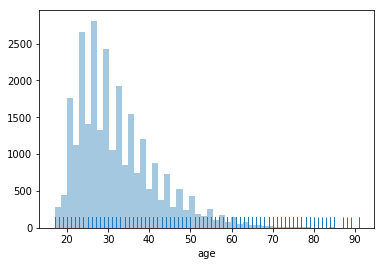

In [0]:
sns.distplot(d2['age'], kde=False, rug=True)

Same pairplot will take insane amount of time in google colab

In [0]:
sns.pairplot(d2)

In [0]:
dataset[d2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [0]:
dataset[d2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [0]:
dataset[d2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [0]:
dataset[d2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

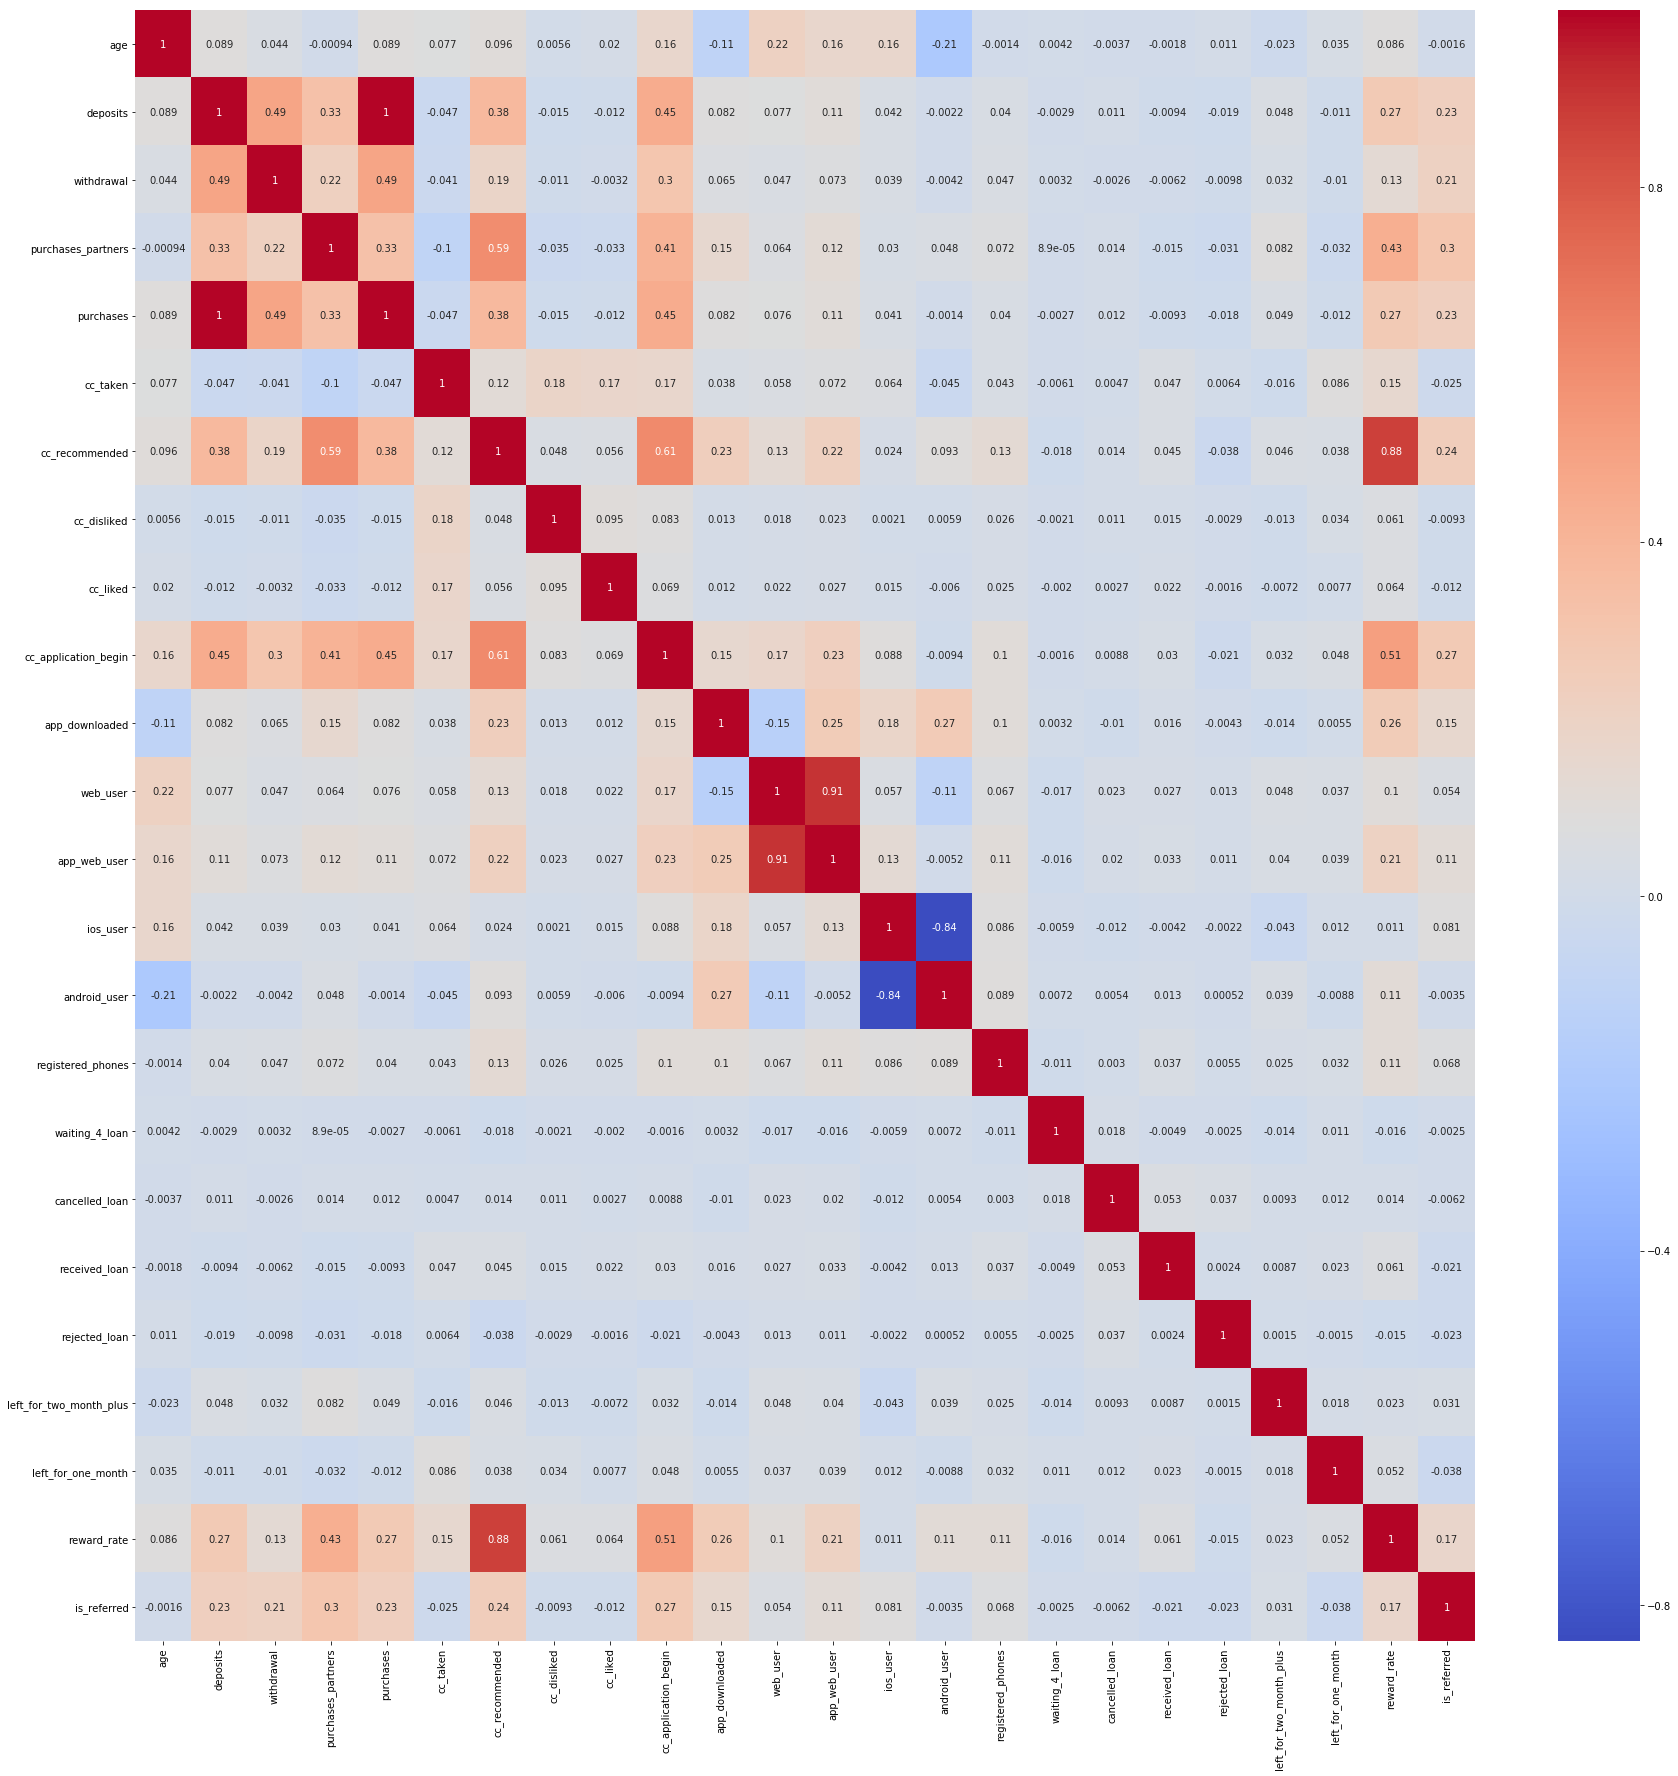

In [0]:
plt.figure(figsize =(30,30))
sns.heatmap(d2.corr(),annot=True,cmap='coolwarm')

In [0]:
dataset=dataset.drop(columns=['app_web_user'])

In [0]:
dataset.to_csv('new',index=False)

In [0]:
id=dataset['user']
dataset=dataset.drop(columns=['user'])

In [0]:
dataset=pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [0]:
dataset=dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [0]:
dataset.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0,37.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.47,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.17,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.10,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.03,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
dataset['churn'].shape

(26996,)

In [0]:
dataset.shape

(26996, 42)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(dataset.drop(columns=['churn']),dataset['churn'],test_size=0.3,random_state=0,stratify=dataset['churn'])

In [0]:
x_test.shape

(8099, 41)

In [0]:
x_train.shape

(18897, 41)

In [0]:
y_train.shape

(18897,)

In [0]:
y_test.shape

(8099,)

In [0]:
y_train.value_counts()

0    11075
1     7822
Name: churn, dtype: int64

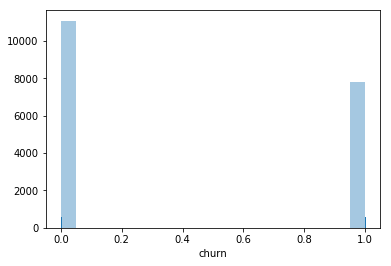

In [0]:
sns.distplot(y_train, bins=20, kde=False, rug=True);

some might conside as enough balanced and some might consider balanced
better to not resmaple becoz of its size effect


if u want to balance it


In [0]:
pos=y_train[y_train.values==1]
neg=y_train[y_train.values==0]

In [0]:
pos

In [0]:
if len(pos)>len(neg):
  high = pos
  low = neg
else:
  high=neg
  low=pos

In [0]:
low.value_counts()


1    7814
Name: churn, dtype: int64

In [0]:
from sklearn.utils import resample

better to use downsample .... if u think it is imbalance

In [0]:
#df_resample = resample(high, replace=False,    # sample without replacement
 #                                n_samples=7814,     # to match minority class
  #                               random_state=123
 #or
"""import random
random.seed(0)
high=np.random.choice(high,size=len(low))
low=np.asarray(low)

new=pd.concat([low,high])
x_train=x_train.loc[new,]
y_train=y_train[new]"""





In [0]:
high.value_counts()

0    11083
Name: churn, dtype: int64

In [0]:
df_resample.value_counts()

0    7814
Name: churn, dtype: int64

In [0]:
new = pd.concat([df_resample, low])

In [0]:
new.value_counts()

1    7814
0    7814
Name: churn, dtype: int64

In [0]:
#x_train=x_train.loc[new,]
y_train=new

In [0]:
y_train.value_counts()

1    7814
0    7814
Name: churn, dtype: int64

In [0]:
y_train.shape

(15628,)

In [0]:
x_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
16981,23.0,13,1,23,13,0,54,0,0,12,1,0,1,0,0,0,1,0,0,0,0,0.57,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10669,46.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
929,26.0,8,1,70,8,0,187,0,0,10,1,1,0,1,0,0,0,0,0,1,0,1.73,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6529,20.0,0,0,5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19512,32.0,0,0,5,0,0,23,0,0,5,1,1,0,1,0,0,0,0,0,0,0,0.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_x = StandardScaler()
xtrain = pd.DataFrame(sc_x.fit_transform(x_train))
xtest=pd.DataFrame(sc_x.fit_transform(x_test))

In [0]:
xtrain.columns = x_train.columns.values

In [0]:
xtrain.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,-0.926459,1.040748,0.652269,-0.121174,1.070477,-0.160492,-0.437730,-0.055694,-0.052763,0.302239,0.223625,-1.243966,1.230951,-1.181768,-0.460342,-0.03414,7.115557,-0.131871,-0.069945,-0.457019,-0.137571,-0.451948,-0.684740,-0.295333,1.208398,1.066276,-0.329626,-0.314005,-0.496906,-0.290434,-0.281993,-0.317147,6.268342,-0.295121,-0.311149,-0.292571,-0.291717,-0.288286,-0.289469,-0.301537,-0.313496
1,1.393310,-0.366986,-0.288570,-0.662013,-0.366778,-0.160492,-1.044029,-0.055694,-0.052763,-0.660318,-4.471763,0.803880,-0.812380,-1.181768,-0.460342,-0.03414,-0.140537,-0.131871,-0.069945,-0.457019,-0.137571,-1.210605,-0.684740,-0.295333,-0.827542,1.066276,-0.329626,-0.314005,-0.496906,-0.290434,-0.281993,-0.317147,-0.159532,-0.295121,-0.311149,-0.292571,-0.291717,3.468777,-0.289469,-0.301537,-0.313496
2,-0.623881,0.499312,0.652269,0.984020,0.517687,-0.160492,1.055562,-0.055694,-0.052763,0.141813,0.223625,0.803880,-0.812380,0.846190,-0.460342,-0.03414,-0.140537,-0.131871,-0.069945,2.188093,-0.137571,1.091985,1.460408,3.386006,-0.827542,1.066276,-0.329626,-0.314005,-0.496906,-0.290434,-0.281993,-0.317147,-0.159532,-0.295121,-0.311149,-0.292571,-0.291717,3.468777,-0.289469,-0.301537,-0.313496
3,-1.229038,-0.366986,-0.288570,-0.544439,-0.366778,-0.160492,-1.044029,-0.055694,-0.052763,-0.660318,0.223625,-1.243966,-0.812380,0.846190,-0.460342,-0.03414,-0.140537,-0.131871,-0.069945,-0.457019,-0.137571,-1.210605,-0.684740,-0.295333,-0.827542,-0.937843,3.033738,-0.314005,-0.496906,-0.290434,-0.281993,-0.317147,-0.159532,3.388437,-0.311149,-0.292571,-0.291717,-0.288286,-0.289469,-0.301537,-0.313496
4,-0.018723,-0.366986,-0.288570,-0.544439,-0.366778,-0.160492,-0.785790,-0.055694,-0.052763,-0.259253,0.223625,0.803880,-0.812380,0.846190,-0.460342,-0.03414,-0.140537,-0.131871,-0.069945,-0.457019,-0.137571,-1.077508,-0.684740,-0.295333,1.208398,-0.937843,-0.329626,-0.314005,-0.496906,-0.290434,-0.281993,-0.317147,-0.159532,-0.295121,-0.311149,-0.292571,-0.291717,-0.288286,-0.289469,-0.301537,-0.313496


In [0]:
xtest.columns = x_test.columns.values

In [0]:
xtest.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0.069456,-0.026164,4.520565,1.208141,-0.019732,-0.189132,1.042664,-0.064233,-0.064898,0.069847,0.222488,-1.232847,1.262276,-1.218967,-0.463115,-0.040096,-0.133589,-0.145543,-0.070451,-0.460699,-0.131174,0.618796,1.473888,-0.296632,-0.826701,-0.956614,-0.331983,-0.317814,2.057983,-0.294656,-0.285146,-0.306861,-0.164347,-0.296385,-0.309024,-0.292423,-0.294161,-0.284386,3.365597,-0.298107,-0.312131
1,-0.724226,-0.363766,-0.296557,-0.406410,-0.363165,-0.189132,-0.925696,-0.064233,-0.064898,-0.646220,0.222488,0.811130,1.262276,-1.218967,-0.463115,-0.040096,-0.133589,-0.145543,-0.070451,-0.460699,-0.131174,-0.761478,-0.678478,-0.296632,-0.826701,1.045354,-0.331983,-0.317814,-0.485913,-0.294656,-0.285146,-0.306861,-0.164347,-0.296385,-0.309024,-0.292423,3.399498,-0.284386,-0.297124,-0.298107,-0.312131
2,-0.426595,-0.363766,-0.296557,-0.671486,-0.363165,-0.189132,-1.038821,-0.064233,-0.064898,-0.646220,0.222488,0.811130,-0.792220,0.820367,-0.463115,-0.040096,-0.133589,-0.145543,-0.070451,-0.460699,-0.131174,-0.363322,-0.678478,-0.296632,-0.826701,-0.956614,-0.331983,3.146491,-0.485913,-0.294656,-0.285146,-0.306861,-0.164347,-0.296385,-0.309024,-0.292423,-0.294161,-0.284386,3.365597,-0.298107,-0.312131
3,2.252080,-0.363766,-0.296557,-0.671486,-0.363165,-0.189132,-0.948321,-0.064233,-0.064898,-0.646220,0.222488,0.811130,1.262276,-1.218967,-0.463115,-0.040096,-0.133589,-0.145543,-0.070451,-0.460699,-0.131174,-0.801294,-0.678478,-0.296632,-0.826701,1.045354,-0.331983,-0.317814,-0.485913,-0.294656,-0.285146,-0.306861,-0.164347,-0.296385,-0.309024,-0.292423,-0.294161,-0.284386,-0.297124,-0.298107,-0.312131
4,-1.220277,-0.251232,-0.296557,-0.406410,-0.248687,-0.189132,-0.642886,-0.064233,-0.064898,-0.327968,0.222488,0.811130,-0.792220,0.820367,-0.463115,-0.040096,-0.133589,-0.145543,-0.070451,2.170614,-0.131174,-0.841110,-0.678478,-0.296632,-0.826701,1.045354,-0.331983,-0.317814,-0.485913,3.393785,-0.285146,-0.306861,-0.164347,-0.296385,-0.309024,-0.292423,-0.294161,-0.284386,-0.297124,-0.298107,-0.312131


In [0]:
xtrain.index = x_train.index.values
xtest.index = x_test.index.values

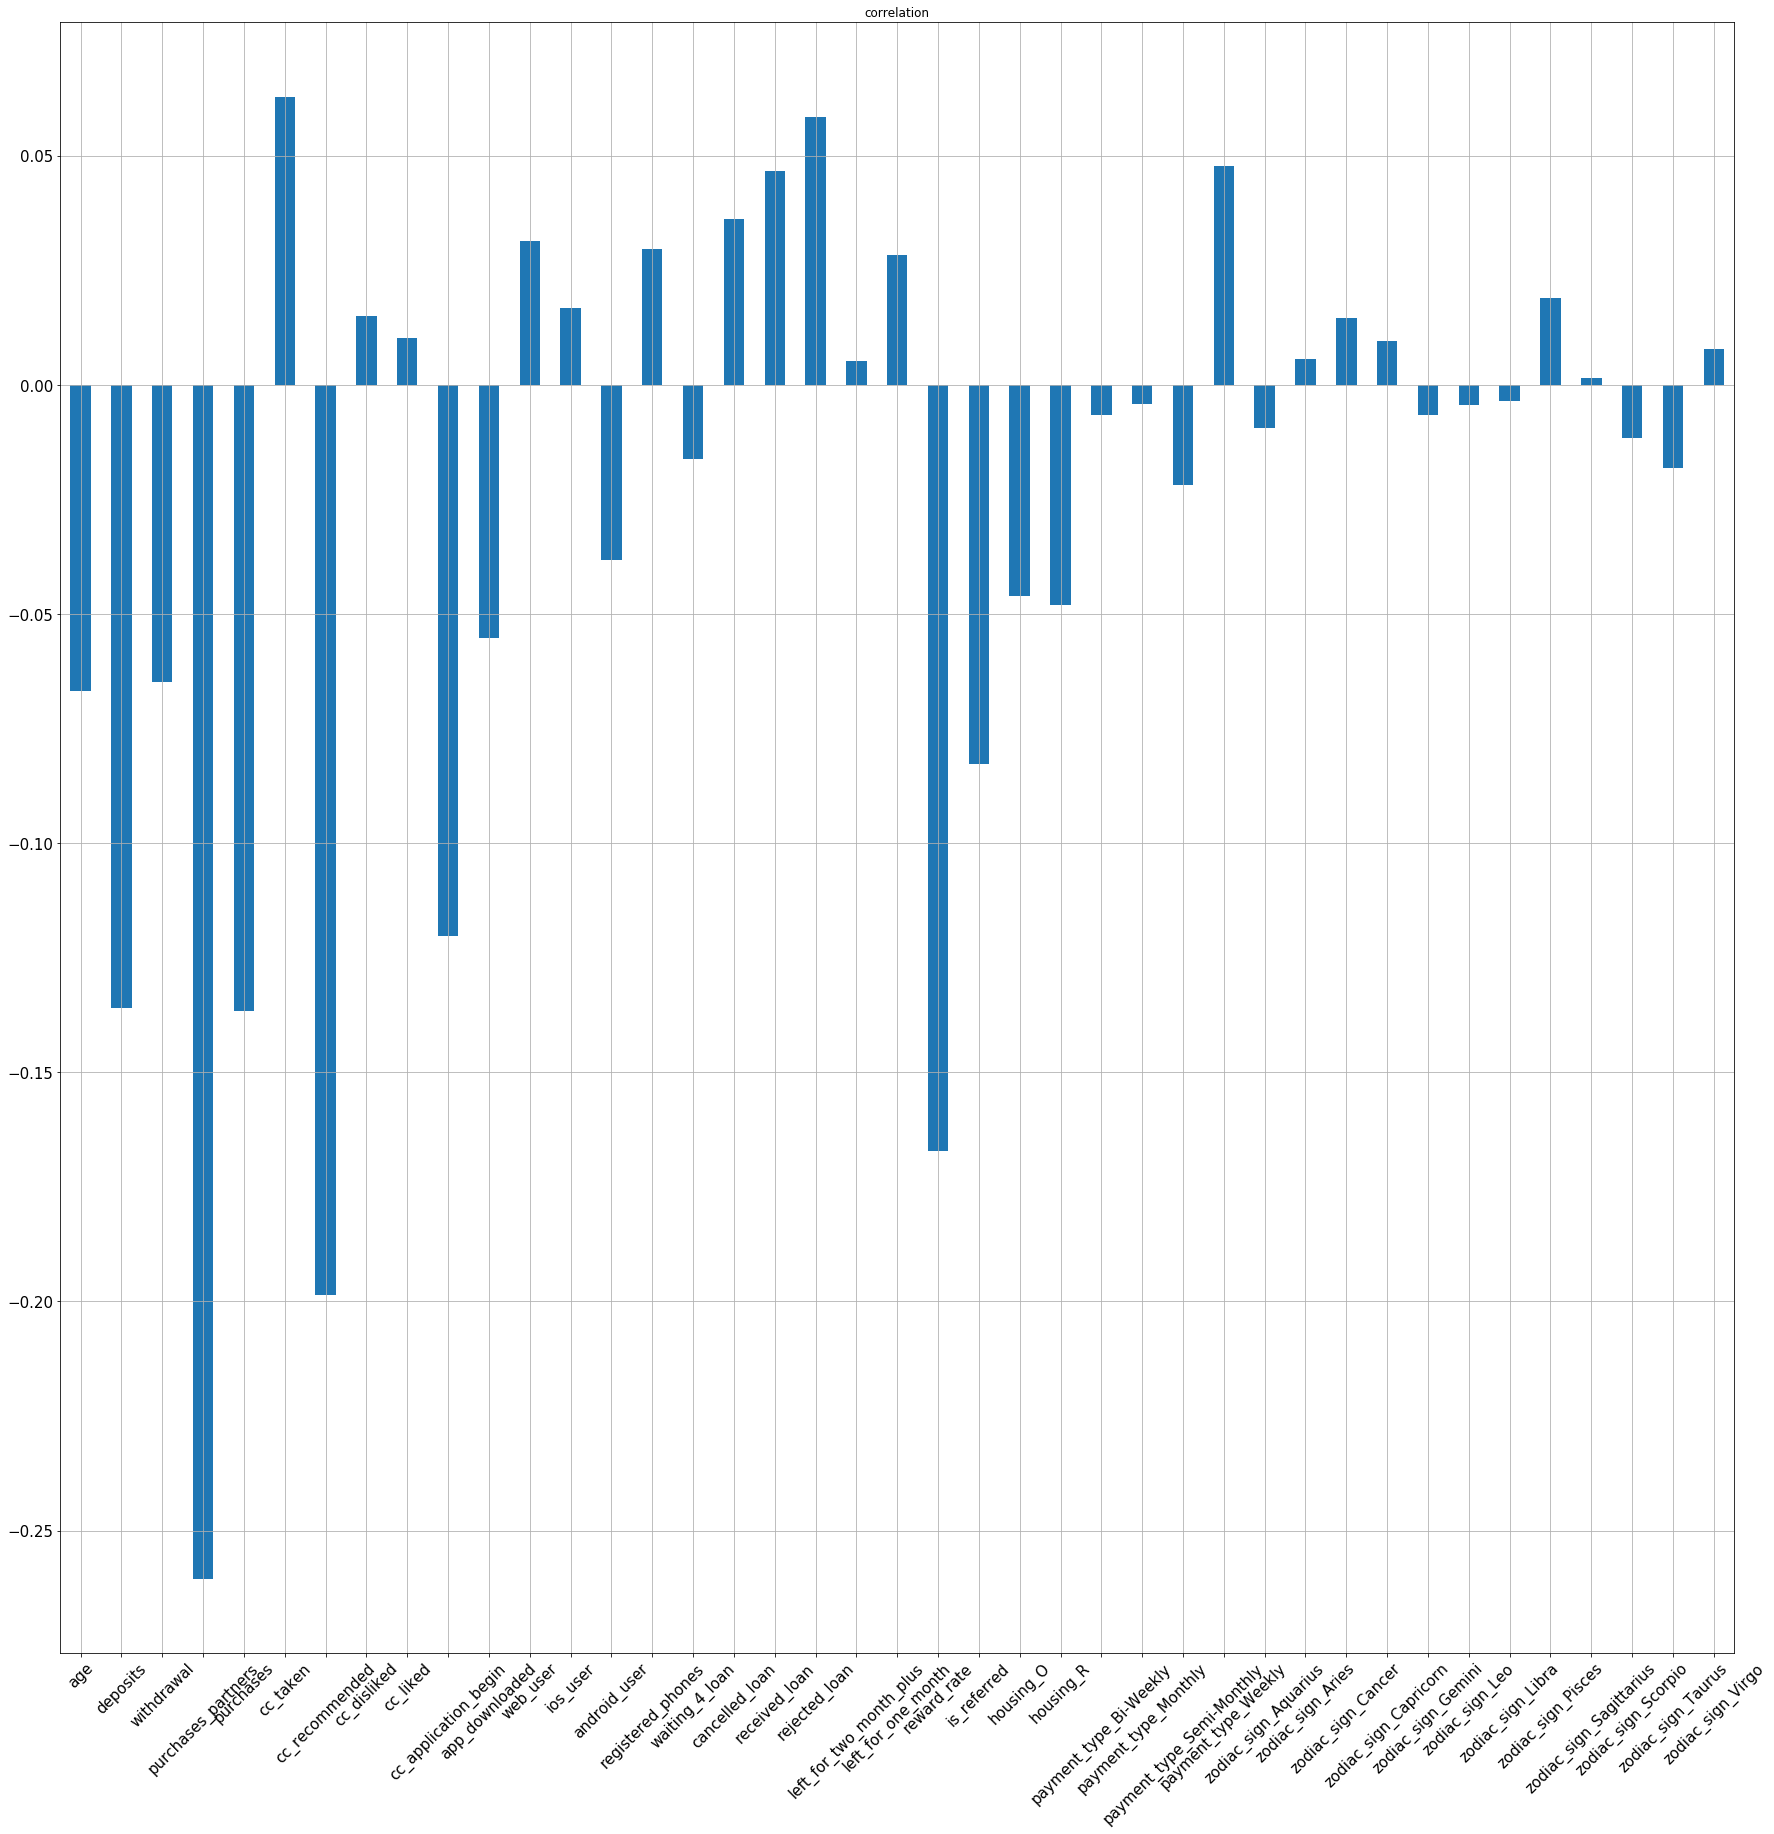

In [0]:
xtrain.corrwith(y_train).plot.bar(figsize=(30,30),title='correlation',fontsize=15,rot=45,grid=True)

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression(class_weight="balanced")

In [0]:
rfe=RFE(model,20)


In [0]:
rfe = rfe.fit(xtrain,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
y=rfe.predict(xtest)

In [0]:
xtrain.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Pisces'],
      dtype='object')

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y)

In [0]:
cm

array([[2562, 2185],
       [ 866, 2486]])

In [0]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63      4747
           1       0.53      0.74      0.62      3352

    accuracy                           0.62      8099
   macro avg       0.64      0.64      0.62      8099
weighted avg       0.66      0.62      0.62      8099



In [0]:
accuracy_score(y_test,y)

0.6232868255340166

time to improve it

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.svm import SVC

In [0]:
model=SVC()

In [0]:
param_grid = {'C': [0.1,1,5,10,15,18,20,25],'gamma':[0.1,1,0.01,0.2,0.02,0.5,0.3,0.03],'kernel':['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=4)

In [0]:
grid.fit(xtrain,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.589, total=  19.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.588, total=  19.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.5s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.587, total=  19.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.586, total=  33.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.586, total=  33.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.586, total=  33.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.630, total=  17.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.619, total=  17.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.609, total=  17.6s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.586, total=  21.5s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 114.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 15, 18, 20, 25],
                         'gamma': [0.1, 1, 0.01, 0.2, 0.02, 0.5, 0.3, 0.03],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [0]:
grid.best_params_

{'C': 15, 'gamma': 0.01, 'kernel': 'rbf'}

In [0]:
pred=grid.predict(xtest)

In [0]:
pred

array([0, 1, 1, ..., 1, 0, 0])

In [0]:
cm=confusion_matrix(y_test,y)

In [0]:
cm

array([[2562, 2185],
       [ 866, 2486]])

In [0]:
accuracy_score(y_test,pred)

0.6719348067662675

In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      4747
           1       0.62      0.54      0.57      3352

    accuracy                           0.67      8099
   macro avg       0.66      0.65      0.65      8099
weighted avg       0.67      0.67      0.67      8099



better result

In [0]:
result=SVC(C=15, gamma=0.01, kernel='rbf')

In [0]:
result.fit(xtrain[xtrain.columns[rfe.support_]],y_train)

SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
cm=confusion_matrix(xtest[xtest.columns[rfe.support_]],y_test)


In [0]:
accuracy_score(y_test,result.predict(xtest[xtrain.columns[rfe.support_]]))

0.6811952092850969

more better now